In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def Explicit_euler(s0,i0,r0,beta,gamma,Tmax): #Tmax means the final time t, corresponding to i_t
    deltaT=1
    state=np.array([s0,i0,r0],dtype=float)
    history_data=state.copy()
    print('initial state0:',history_data)
    n=Tmax/deltaT
    N=s0+i0+r0
    for times in range(int(n)):
        s,i,r=state
        state+=deltaT*np.array([-beta*s*i/N,beta*s*i/N - gamma*i, gamma*i])
        print('state%d:'%(times+1),state)
        # print(type(history_data),type(state))
        history_data=np.vstack((history_data,state))
    return state, history_data

In [17]:
Nowstate, NewHavenHist=Explicit_euler(134000-1,1,0,2,1,30)
# print(NewHavenHist)
print(len(NewHavenHist))
X=np.arange(len(NewHavenHist))
I=NewHavenHist[:,1]
index=np.where(I<1)
print('The disease ends at Day',index[0][0],'starts from day0')
print('Infected Peak is Day',np.argmax(I))
print('Number of infected people:',np.max(I))
# print(I)

initial state0: [1.33999e+05 1.00000e+00 0.00000e+00]
state1: [1.33997000e+05 1.99998507e+00 1.00000000e+00]
state2: [1.33993000e+05 3.99988060e+00 2.99998507e+00]
state3: [1.33985001e+05 7.99934331e+00 6.99986567e+00]
state4: [1.33969004e+05 1.59968958e+01 1.49992090e+01]
state5: [1.33937018e+05 3.19863910e+01 3.09961048e+01]
state6: [1.33873075e+05 6.39427136e+01 6.29824958e+01]
state7: [1.33745310e+05 1.27764294e+02 1.26925209e+02]
state8: [133490.2675844     255.04291248    254.68950312]
state9: [132982.12211229    508.14547212    509.7324156 ]
state10: [131973.55101939   1008.57109289   1017.87788771]
state11: [129986.91357783   1986.63744156   2026.44898061]
state12: [126132.6319446    3854.28163323   4013.08642217]
state13: [118876.65154676   7255.98039784   7867.3680554 ]
state14: [106002.52239176  12874.12915499  15123.34845324]
state15: [85634.01248092 20368.50991084 27997.47760824]
state16: [59600.62095968 26033.39152124 48365.98751908]
state17: [36442.31796935 23158.3029903

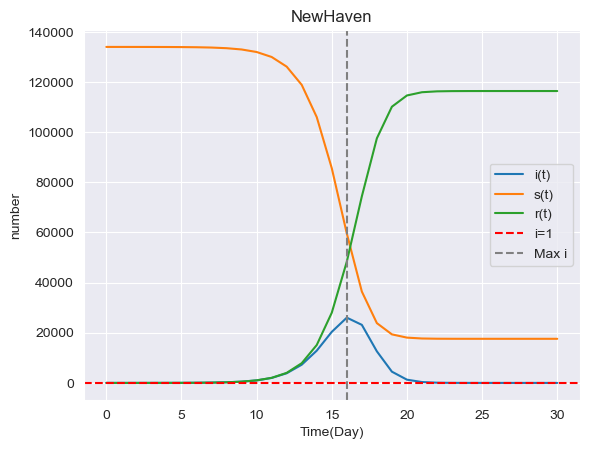

In [18]:
plt.plot(X,I,label='i(t)')
plt.plot(X,NewHavenHist[:,0],label='s(t)')
plt.plot(X,NewHavenHist[:,2],label='r(t)')
# plt.yscale('log')
plt.xlabel('Time(Day)')
plt.ylabel('number')
plt.title('NewHaven')
plt.axhline(1,color='red',linestyle='--',label='i=1')
plt.axvline(16,color='gray',linestyle='--',label='Max i')
plt.legend()
plt.savefig('Newhaven.png')
plt.show()

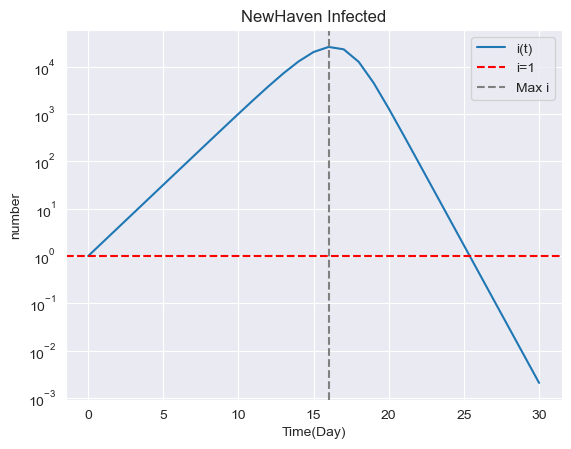

In [19]:
plt.plot(X,I,label='i(t)')
plt.yscale('log')
plt.xlabel('Time(Day)')
plt.ylabel('number')
plt.title('NewHaven Infected')
plt.axhline(1,color='red',linestyle='--',label='i=1')
plt.axvline(16,color='gray',linestyle='--',label='Max i')
plt.legend()
plt.savefig('NewhavenInfected.png')
plt.show()

initial state0: [1.33999e+05 1.00000e+00 0.00000e+00]
state1: [1.33997500e+05 1.99998881e+00 5.00000000e-01]
state2: [1.33994500e+05 3.99992164e+00 1.49999440e+00]
state3: [1.33988500e+05 7.99959702e+00 3.49995522e+00]
state4: [1.33976502e+05 1.59981643e+01 7.49975374e+00]
state5: [1.33952509e+05 3.19921205e+01 1.54988359e+01]
state6: [1.33904538e+05 6.39672335e+01 3.14948961e+01]
state7: [1.33808655e+05 1.27866111e+02 6.34785129e+01]
state8: [1.33617130e+05 2.55458344e+02 1.27411568e+02]
state9: [133235.03743034    509.82182938    255.14074028]
state10: [132474.67029766   1015.27804737    510.05165497]
state11: [130969.08867916   2013.22064218   1017.69067865]
state12: [128017.56249091   3958.13650934   2024.30099975]
state13: [122345.4245663    7651.20617928   4003.36925442]
state14: [111866.8043971   14304.22325884   7828.97234406]
state15: [93954.47888945 25064.43713707 14981.08397348]
state16: [67593.47743568 38893.22002231 27513.30254201]
state17: [38165.17904039 48874.90840644 4

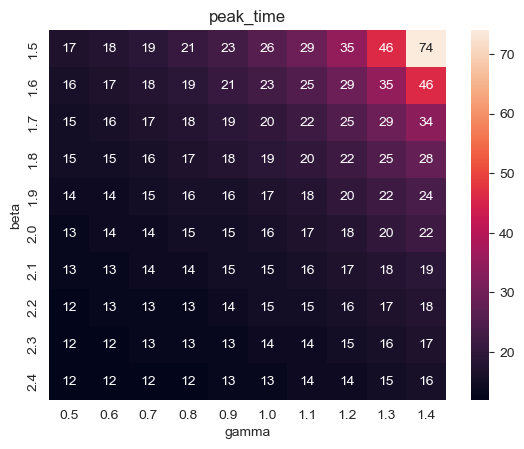

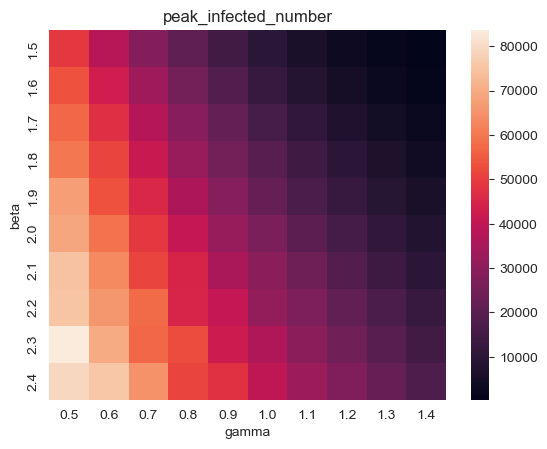

In [21]:
beta=np.linspace(1.5,2.5,10,endpoint=False)
gamma=np.linspace(0.5,1.5,10,endpoint=False)
gamma=np.around(gamma,3)
peak_time=np.zeros((10,10))
peak_num=np.zeros((10,10))
for i in range(len(beta)):
    for j in range(len(gamma)):
        Nowstate, NewHavenHist=Explicit_euler(134000-1,1,0,beta[i],gamma[j],100)
        I=NewHavenHist[:,1]
        index=np.where(I<1)
        # print('The disease ends at Day',index[0][0],'starts from day0')
        peak_time[i][j]=np.argmax(I)
        peak_num[i][j]=np.max(I)
        # print('Infected Peak is Day',np.argmax(I))
        # print('Number of infected people:',np.max(I))
import seaborn as sns
df_time=pd.DataFrame(peak_time,index=beta,columns=gamma)
sns.heatmap(df_time,annot=True)
#X-axis is gamma
plt.title('peak_time')
plt.xlabel('gamma')
plt.ylabel('beta')
plt.savefig('heatmap_time.png')
plt.show()
df_num=pd.DataFrame(peak_num,index=beta,columns=gamma)
sns.heatmap(df_num)
plt.title('peak_infected_number')
plt.xlabel('gamma')
plt.ylabel('beta')
plt.savefig('heatmap_num.png')
plt.show()